## SALARY DATA LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
df=pd.read_csv('Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


##EDA Part

In [5]:
df.shape

(30, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


From this we got to know there is no any null values in our data set

In [7]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values

In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Outlier Detection


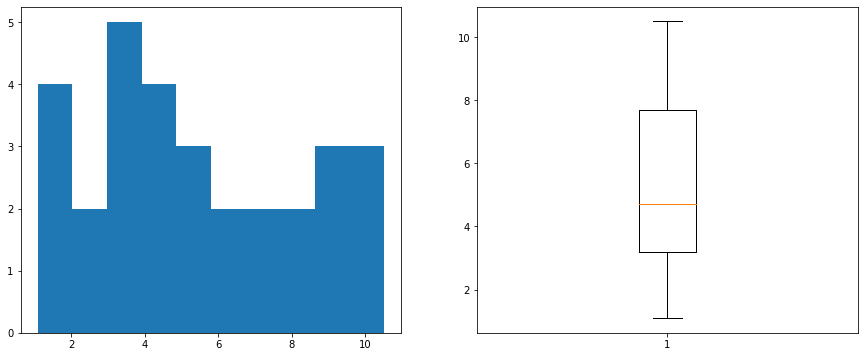

In [10]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df["YearsExperience"])
 
plt.subplot(1,2,2)
plt.boxplot(df["YearsExperience"])
plt.show()

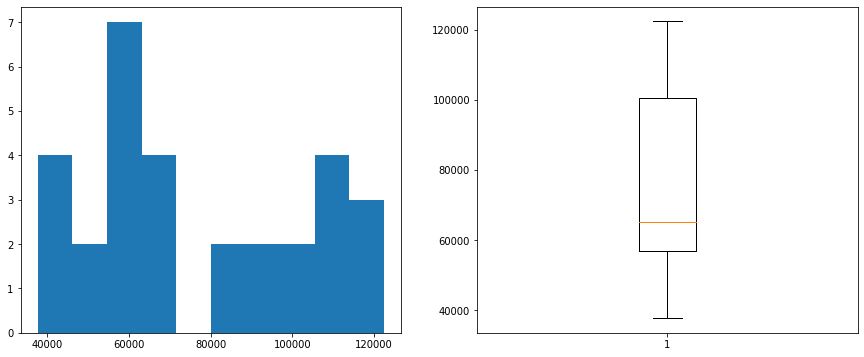

In [11]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df["Salary"])
 
plt.subplot(1,2,2)
plt.boxplot(df["Salary"])
plt.show()

In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


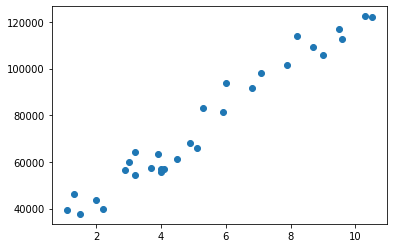

In [13]:
plt.scatter(df["YearsExperience"], df["Salary"]) 

## Fitting Simple Linear Regression Model

In [14]:
model=smf.ols("Salary~YearsExperience",data=df).fit()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


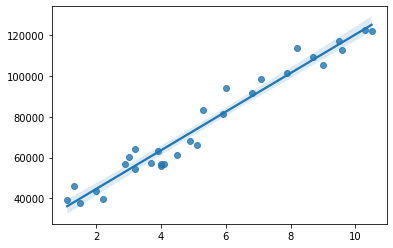

In [15]:
sns.regplot(X,y)

In [16]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


## H0 = Two variables are indep. ie B1 = 0

H1 = Two variables are dependent. ie B1 != 0

p value (1.143068e-20) < alpha so H1 accepted ie two variables are dependent, B1!=0

In [17]:
model.params 
#Y(salary)=B0(25792) + 9449(B1)*X(Years of exp.)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Transforming Years of Experience

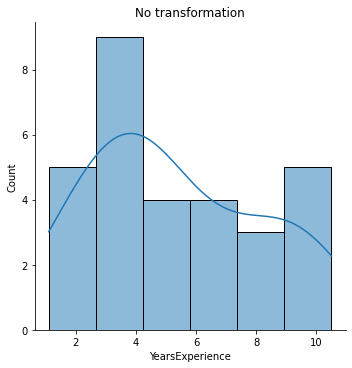

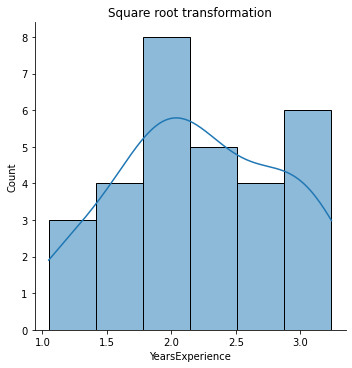

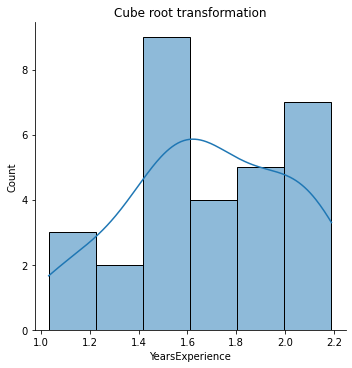

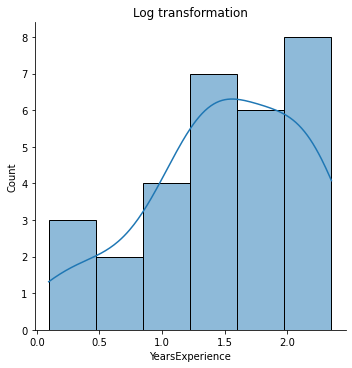

In [19]:
sns.displot(df["YearsExperience"], kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(df["YearsExperience"]), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(df["YearsExperience"]), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(df["YearsExperience"]), kde=True)
plt.title('Log transformation')


plt.show()

Text(0.5, 1.0, 'Log transformation')

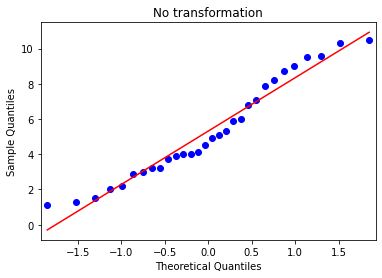

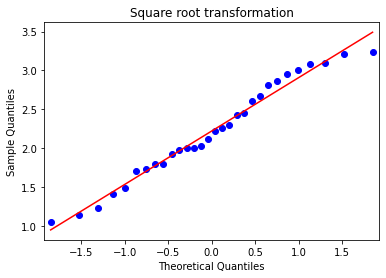

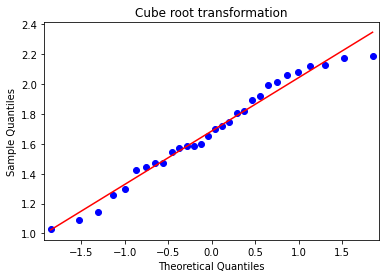

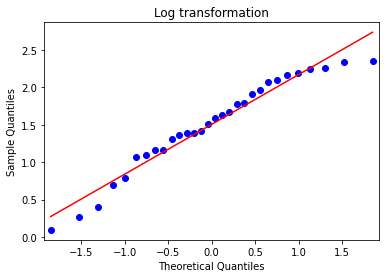

In [20]:
sm.qqplot(df["YearsExperience"], line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(df["YearsExperience"]), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(df["YearsExperience"]), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(df["YearsExperience"]), line = 'r')
plt.title('Log transformation')

## Transforming Salary

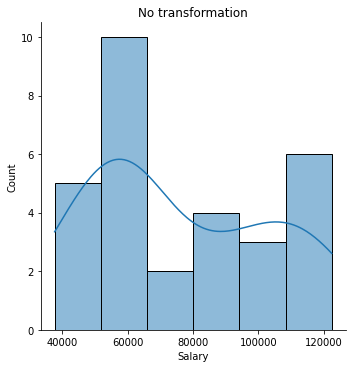

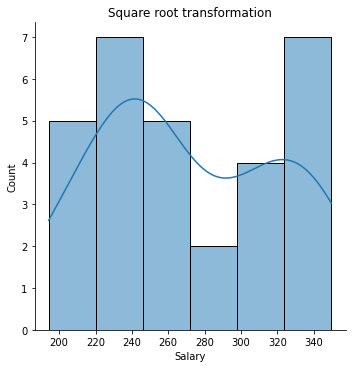

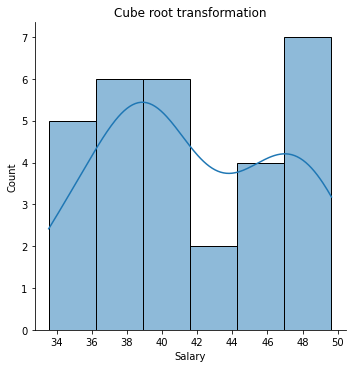

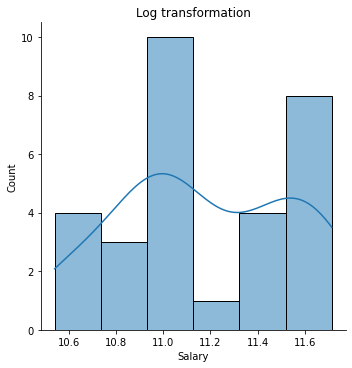

In [21]:
sns.displot(df["Salary"], kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(df["Salary"]), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(df["Salary"]), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(df["Salary"]), kde=True)
plt.title('Log transformation')


plt.show()

Text(0.5, 1.0, 'Log transformation')

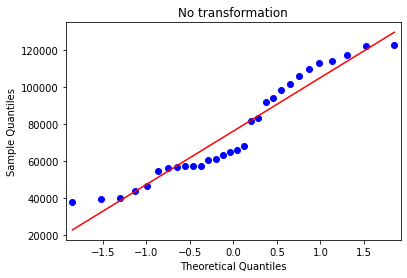

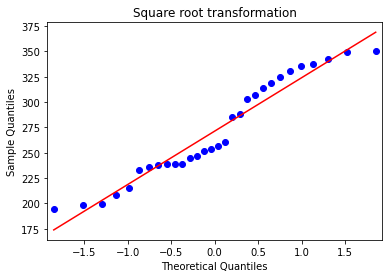

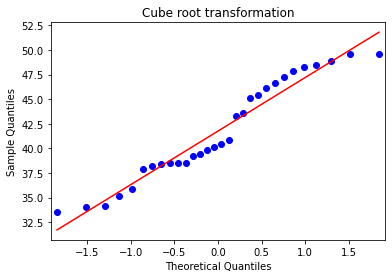

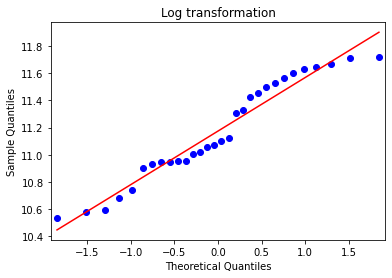

In [22]:
sm.qqplot(df["Salary"], line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(df["Salary"]), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(df["Salary"]), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(df["Salary"]), line = 'r')
plt.title('Log transformation')

In [23]:
model_sqrt = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data =df).fit()

In [24]:
(model_sqrt.rsquared, model_sqrt.rsquared_adj)

(0.9419490138976826, 0.9398757643940284)

In [25]:
model_cbrt = smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data =df).fit()

In [26]:
(model_cbrt.rsquared, model_cbrt.rsquared_adj) 

(0.9324434036761003, 0.9300306680931039)

In [27]:
model_log = smf.ols("np.log(Salary)~np.log(YearsExperience)",data =df).fit()

In [28]:
(model_log.rsquared, model_log.rsquared_adj) 

(0.905215072581715, 0.9018298966024905)

Among all the transformations, Sqrt transformation has highest R square adj value, but not higher than model with No transformation

Model with no transformation has highest r square adj value. 

# Residual Analysis Test for Normality of Residuals (Q-Q Plot)

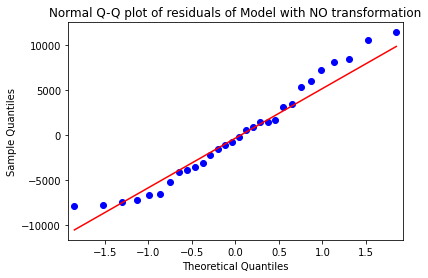

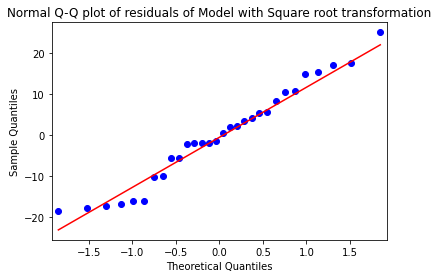

In [29]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with NO transformation')
plt.show()

sm.qqplot(model_sqrt.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Square root transformation')
plt.show() 

# Residual Plot to check Homoscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

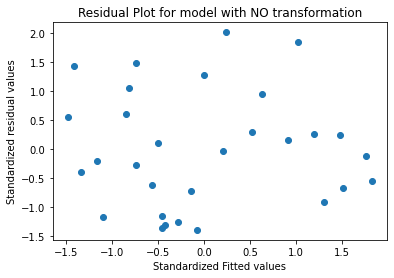

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot for model with NO transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

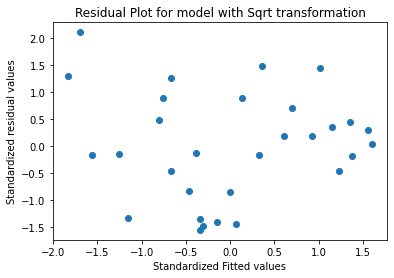

In [32]:
plt.scatter(get_standardized_values(model_sqrt.fittedvalues),
            get_standardized_values(model_sqrt.resid))

plt.title('Residual Plot for model with Sqrt transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Homoscedasticity refers to a condition in which the variance of the residual or error term, in a regression model is constant

#Some errors are positive, some are negative. Hence mean of errors should be zero

In [33]:
errors=model.resid 
errors.mean()

9.701276818911234e-13

## Model Validations

In [34]:
model_rmse=np.sqrt(model.mse_resid)

In [35]:
model_sqrt_pred_y =np.square(model_sqrt.predict(df.YearsExperience))
model_sqrt_rmse =np.sqrt(mean_squared_error(df.Salary, model_sqrt_pred_y))

In [36]:
model_cbrt_pred_y =pow(model_cbrt.predict(df.YearsExperience),3)
model_cbrt_rmse =np.sqrt(mean_squared_error(df.Salary, model_cbrt_pred_y))

In [37]:
model_log_pred_y =np.exp(model_log.predict(df.YearsExperience))
model_log_rmse =np.sqrt(mean_squared_error(df.Salary, model_log_pred_y))

In [38]:
print('model=', model_rmse,'\n' 'model_sqrt=', model_sqrt_rmse,'\n' 'model_cbrt=', model_cbrt_rmse,'\n' 'model_log=', model_log_rmse)

model= 5788.315051119395 
model_sqrt= 5960.647096174309 
model_cbrt= 6232.815455835847 
model_log= 7219.716974372806


 Model with No transformation has minimum RMSE and highest R square adjusted score. Hence model with NO transformation will be our final model

## Predicting Salary

In [39]:
train_data = pd.DataFrame()
train_data['Salary'] = df.Salary.head(10)
train_data['YearsExperience'] = df.YearsExperience.head(10) 
train_data 

,Salary,YearsExperience
0,39343.0,1.1
1,46205.0,1.3
2,37731.0,1.5
3,43525.0,2.0
4,39891.0,2.2
5,56642.0,2.9
6,60150.0,3.0
7,54445.0,3.2
8,64445.0,3.2
9,57189.0,3.7


In [40]:
train_data['predicted_delivery_normal'] = model.predict(train_data)

In [41]:
train_data['predicted_delivery_log'] = np.exp(model_log.predict(train_data))

In [42]:
train_data 

,Salary,YearsExperience,predicted_delivery_normal,predicted_delivery_log
0,39343.0,1.1,36187.158752,32261.052293
1,46205.0,1.3,38077.151217,35437.122429
2,37731.0,1.5,39967.143681,38405.293942
3,43525.0,2.0,44692.124842,45145.842502
4,39891.0,2.2,46582.117306,47630.388981
5,56642.0,2.9,53197.090931,55631.518478
6,60150.0,3.0,54142.087163,56701.779991
7,54445.0,3.2,56032.079627,58796.479782
8,64445.0,3.2,56032.079627,58796.479782
9,57189.0,3.7,60757.060788,63795.788170


# Taking Input From User

In [43]:
workXp = float(input("Enter your work experience: ")) 

Enter your work experience: 6


In [44]:
newdata=pd.DataFrame([workXp],columns=['YearsExperience']) 
newdata 

,YearsExperience
0,6.0


In [45]:
model.predict(newdata)

0    82491.974127
dtype: float64

## DELIVERY TIME DATA LINEAR REGRESSION

In [46]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error

In [47]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [48]:
dataset=pd.read_csv('delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [49]:
dataset.rename(columns = {'Delivery Time':'Delivery', 
                           'Sorting Time':'Sorting'}, inplace = True)

## Checking for Null Values

In [50]:
dataset.isnull().sum()

Delivery    0
Sorting     0
dtype: int64

In [51]:
# Checking for duplicate vales
dataset.duplicated().sum()

0

In [52]:
dataset.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Outlier Datection

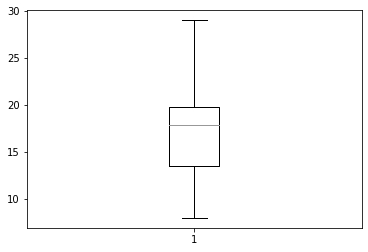

In [53]:
plt.boxplot(dataset["Delivery"])
plt.show()


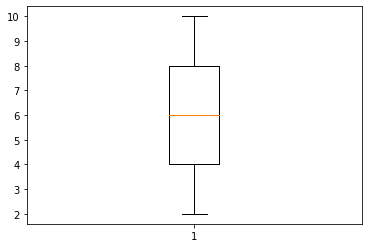

In [54]:
plt.boxplot(dataset["Sorting"])
plt.show()

## Correlation

In [55]:
dataset.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


Text(0, 0.5, 'Delivery Time')

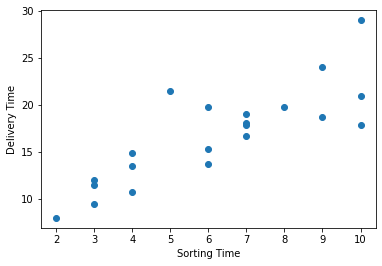

In [56]:
plt.scatter(dataset["Sorting"],dataset["Delivery"])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

## MODEL BUILDING

In [57]:
model=smf.ols("Delivery ~ Sorting", data=dataset).fit()

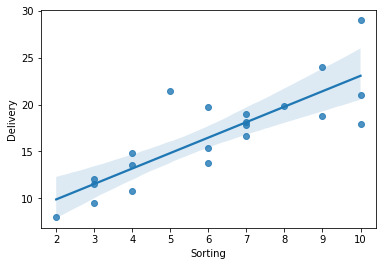

In [58]:
sns.regplot(x="Sorting",y="Delivery",data=dataset)

# Finding T and P Values

In [59]:
print(model.tvalues, '\n',model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [60]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

# rsquared value

In [61]:
rsquare=(model.rsquared,model.rsquared_adj)
rsquare

(0.6822714748417231, 0.6655489208860244)

## Transforming Delivery Time

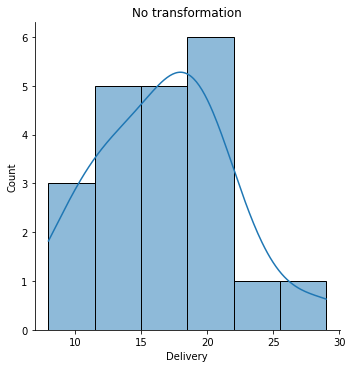

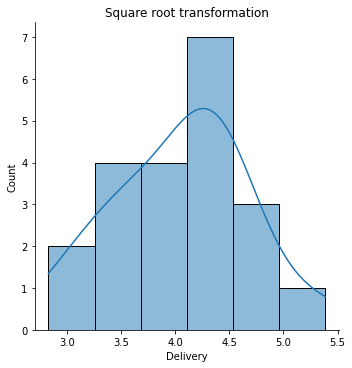

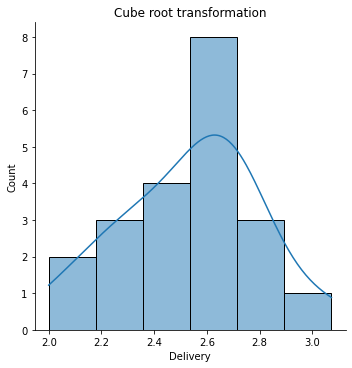

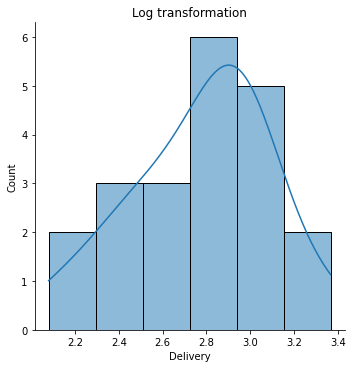

In [62]:
sns.displot(dataset.Delivery, kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(dataset.Delivery), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(dataset.Delivery), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(dataset.Delivery), kde=True)
plt.title('Log transformation')


plt.show()

Text(0.5, 1.0, 'Log transformation')

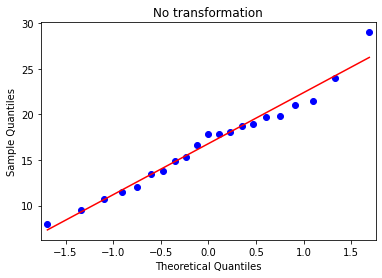

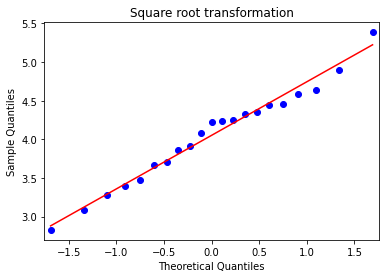

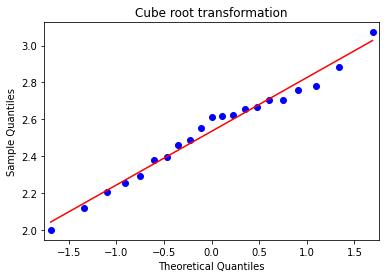

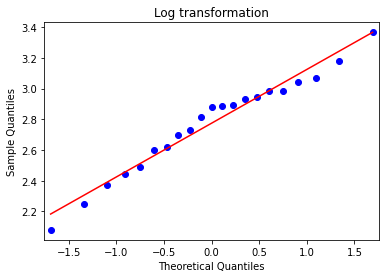

In [63]:
sm.qqplot((dataset.Delivery), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(dataset.Delivery), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(dataset.Delivery), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(dataset.Delivery), line = 'r')
plt.title('Log transformation')

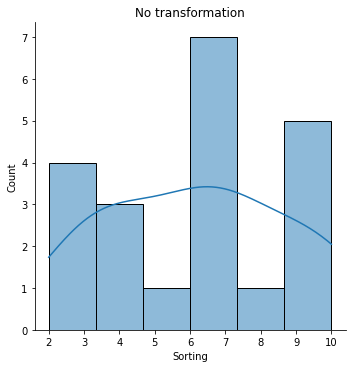

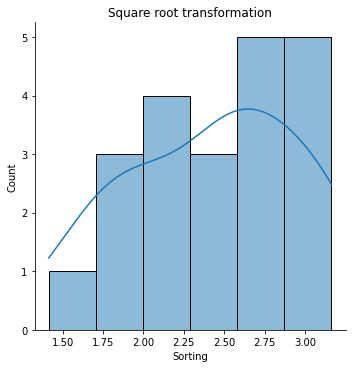

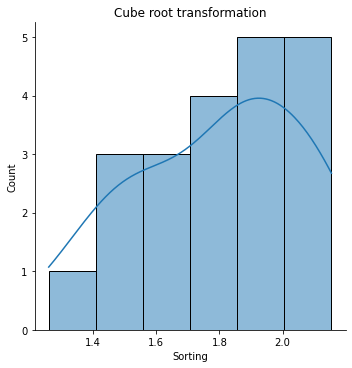

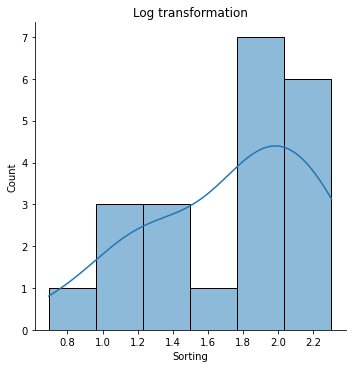

In [64]:
sns.displot(dataset.Sorting, kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(dataset.Sorting), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(dataset.Sorting), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(dataset.Sorting), kde=True)
plt.title('Log transformation')


plt.show()

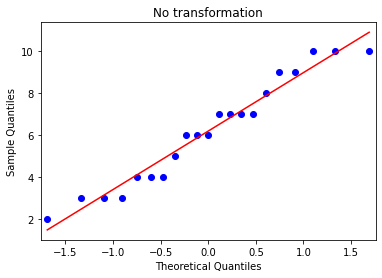

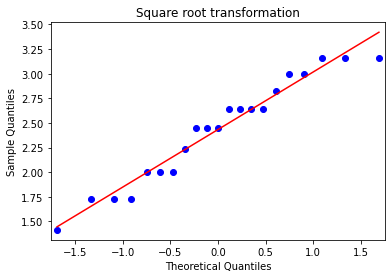

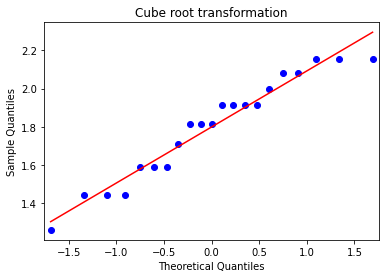

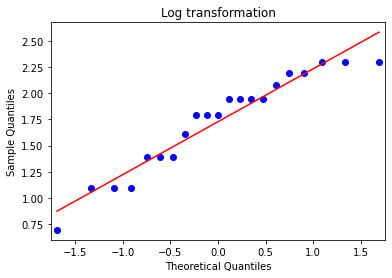

In [65]:
sm.qqplot((dataset.Sorting), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(dataset.Sorting), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(dataset.Sorting), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(dataset.Sorting), line = 'r')
plt.title('Log transformation')

plt.show()

In [66]:
model_sqrt = smf.ols('np.sqrt(Delivery)~np.sqrt(Sorting)' , data=dataset).fit()

In [67]:
(model_sqrt.rsquared, model_sqrt.rsquared_adj) 

(0.7292011987544664, 0.7149486302678594)

In [68]:
# Cuberoot Transformation
model_cbrt = smf.ols('np.cbrt(Delivery)~np.cbrt(Sorting)' , data=dataset).fit()

In [69]:
(model_cbrt.rsquared, model_cbrt.rsquared_adj) 

(0.7441167577566266, 0.7306492186911859)

In [71]:
#Log Transformation
model_log = smf.ols('np.log(Delivery)~np.log(Sorting)' , data=dataset).fit()

In [72]:
(model_log.rsquared, model_log.rsquared_adj) 

(0.77216134926874, 0.7601698413355158)

Now settele for this R Square adj value is 0.76016 which is from Log Transformation

In [73]:
model_log.params

Intercept          1.741987
np.log(Sorting)    0.597522
dtype: float64

In [74]:
print(model_log.tvalues , '\n' , model_log.pvalues)

Intercept          13.085552
np.log(Sorting)     8.024484
dtype: float64 
 Intercept          5.921137e-11
np.log(Sorting)    1.601539e-07
dtype: float64


p value (1.601539e-07) < alpha so H1 accepted ie two variables are dependent, B1!=0

## RESIDUAL ANALYSIS

Test for Normality of Residuals (Q-Qplot)

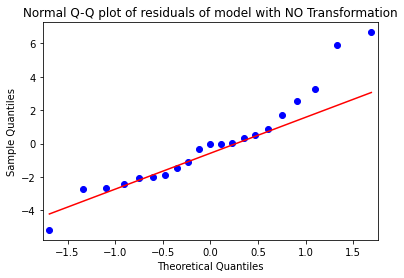

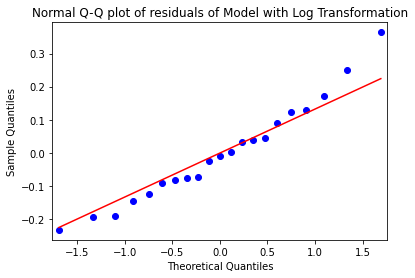

In [75]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of model with NO Transformation')
plt.show()

sm.qqplot(model_log.resid, line='q')
plt.title('Normal Q-Q plot of residuals of Model with Log Transformation')
plt.show()

Model with log-transformation follows near normal distributon with less skewness than model with no transformation

##Residual Plot to check Homoscedasticity

In [76]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

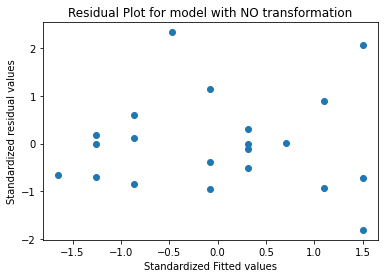

In [77]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot for model with NO transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

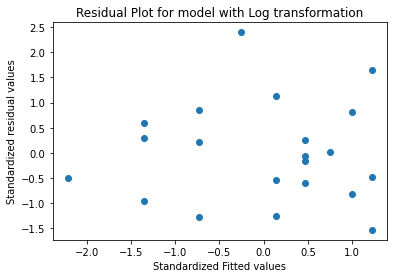

In [78]:
plt.scatter(get_standardized_values(model_log.fittedvalues),
            get_standardized_values(model_log.resid))

plt.title('Residual Plot for model with Log transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

There is no pattern between residual and fittedd value

## Some Errors are positive and some are negative.Therefore mean of errors should be Zero

In [80]:
errors=model_log.resid 
errors.mean() 

-7.190015778524823e-16

## MODEL VALIDATION

We will use RMSE as a performance metric in case of linear regression. First we take SQUARE of distance between predicted values and actual values to get rid of negative numbers, then we take MEAN and then we take ROOT to nullify the effect of squares taken earlier.

We will have to take square, cube and exponential of values predicted by model_sqrt, model_cbrt and model_log to nullify effect of transformation.

In [81]:
model_rmse=np.sqrt(model.mse_resid)

In [83]:
model_sqrt_pred_y =np.square(model_sqrt.predict(dataset.Sorting))
model_sqrt_rmse =np.sqrt(mean_squared_error(dataset.Delivery, model_sqrt_pred_y))

In [84]:
model_cbrt_pred_y =pow(model_cbrt.predict(dataset.Sorting),3)
model_cbrt_rmse =np.sqrt(mean_squared_error(dataset.Delivery, model_cbrt_pred_y))

In [85]:
model_log_pred_y =np.exp(model_log.predict(dataset.Sorting))
model_log_rmse =np.sqrt(mean_squared_error(dataset.Delivery, model_log_pred_y))

In [86]:
print('model=', model_rmse,'\n' 'model_sqrt=', model_sqrt_rmse,'\n' 'model_cbrt=', model_cbrt_rmse,'\n' 'model_log=', model_log_rmse)

model= 2.934903768890139 
model_sqrt= 2.762294279320867 
model_cbrt= 2.755584309893576 
model_log= 2.745828897614548


Model_log has minimum RMSE and highest R square adjusted score. Hence model with log transformation will be our final model

## predecting Values

In [87]:
#Predicting for Train Data
train_data = pd.DataFrame()
train_data['Sorting'] = dataset.Sorting.head(10)
train_data['Delivery'] = dataset.Delivery.head(10)


In [88]:
train_data['predicted_delivery_normal'] = model.predict(train_data)

In [89]:
train_data['predicted_delivery_log'] = np.exp(model_log.predict(train_data))

In [90]:
train_data

,Sorting,Delivery,predicted_delivery_normal,predicted_delivery_log
0,10,21.00,23.072933,22.597360
1,4,13.50,13.178814,13.070123
2,6,19.75,16.476853,16.653216
3,9,24.00,21.423913,21.218593
4,10,29.00,23.072933,22.597360
5,6,15.35,16.476853,16.653216
6,7,19.00,18.125873,18.259981
7,3,9.50,11.529794,11.005911
8,10,17.90,23.072933,22.597360
9,9,18.75,21.423913,21.218593


## Predicting New Data

In [93]:
newdata=pd.DataFrame([4.5, 8.75],columns=['Sorting'])
newdata['predicted_delivery_normal'] = model.predict(newdata)
newdata['predicted_delivery_log'] =  np.exp(model_log.predict(newdata))

In [94]:
newdata

,Sorting,predicted_delivery_normal,predicted_delivery_log
0,4.50,14.003324,14.023113
1,8.75,21.011658,20.864416
